###  $$The\ Time\ Series\ Analysis\ using\ ARIMA\ Model$$ 

##### So, import some important libraries

In [33]:
import predict as pr;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;
import statsmodels.api as sm;
import pmdarima as pm;
import time;
import warnings;
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm_notebook;
warnings.filterwarnings("ignore")

##### Let's download the dataset using the module "predict". 
> Attention! You mast to install all modules. Use the following command
**"pip install - r List_of_modules.txt"**

In [2]:
a=pr.Predict("EURUSD",market="OANDA", freg="5m",n_bars=350);

you are using nologin method, data you access may be limited


##### Let's to do the pre analysis

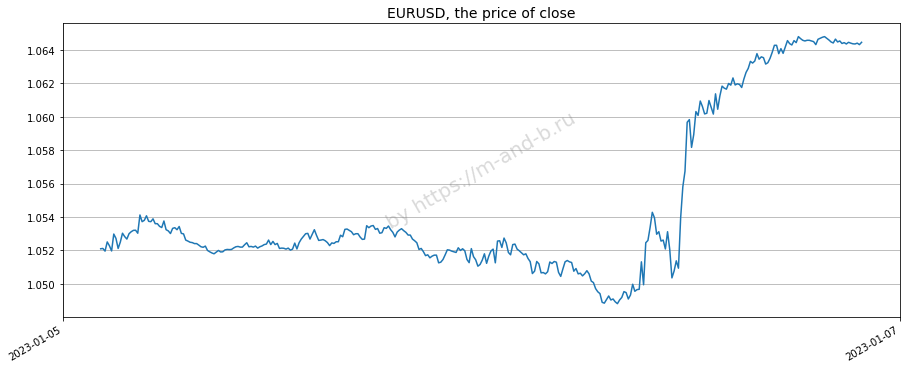

In [3]:
df=a.get_data();# get the data;
a.plot_data_close(w=15,h=6);# Look at the data

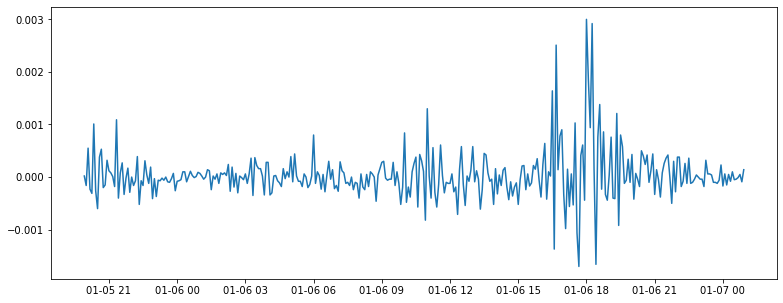

In [4]:
#Look at the diff data
x = df.close;
Dx=df['close'].diff()[1:];
plt.figure(figsize=(13,5));
plt.plot(Dx);
plt.show()



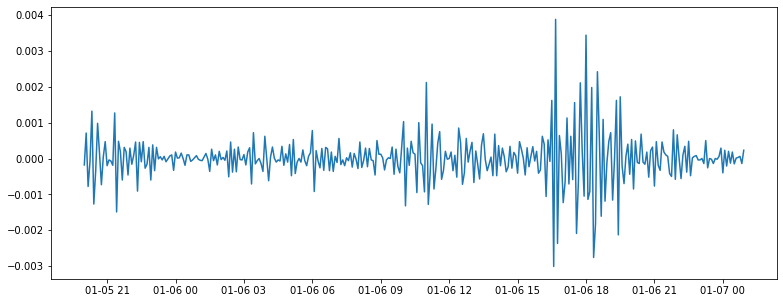

In [31]:
#Look at the diff(diff) data
x = df.close;
DDx=(df['close'].diff()[1:]).diff();
plt.figure(figsize=(13,5));
plt.plot(DDx);
plt.show()

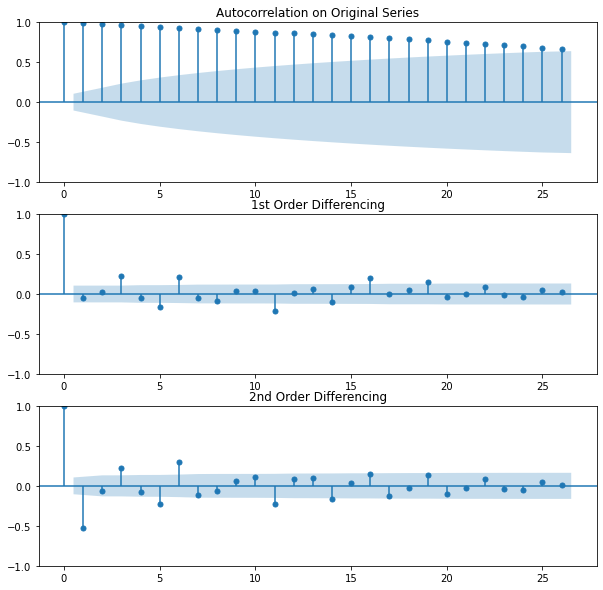

In [38]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(x, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(x.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(x.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

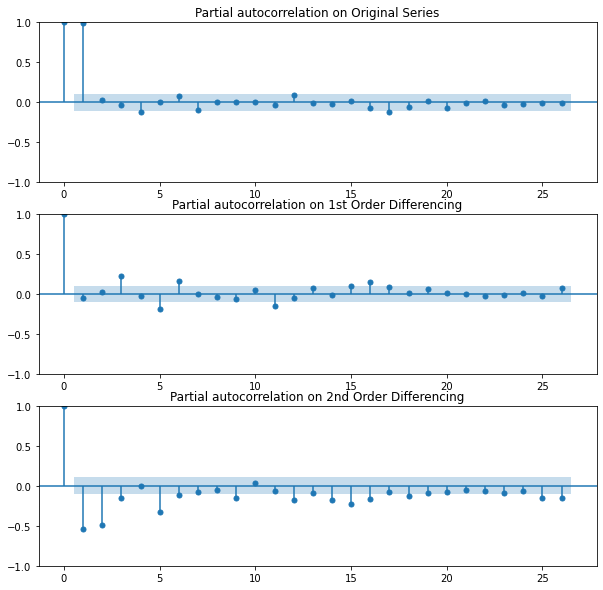

In [41]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_pacf(x, ax=ax1,
               title="Partial autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_pacf(x.diff().dropna(), ax=ax2, 
               title="Partial autocorrelation on 1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_pacf(x.diff().diff().dropna(), ax=ax3, 
               title="Partial autocorrelation on 2nd Order Differencing")

##### So.. we have hypothesis about our data not stationary. But the first difference(data) is stationary

### $$To\ do\ the\  DF-test\ on\ stationary\ of\ the \ data$$

[1]. Dickey, D. A.; Fuller, W. A. (1979). "Distribution of the Estimators for Autoregressive Time Series with a Unit Root". Journal of the American Statistical Association. 74 (366): 427–431. doi:10.1080/01621459.1979.10482531. JSTOR 2286348.

In [5]:
###########################################################
from statsmodels.tsa.stattools import adfuller
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1] >0.05:
    print("**********************************************")
    print("ADF TRUE, The TimeSeries is not stationary");
    print("**********************************************")
if result[1] <0.05:
    print("**********************************************");
    print("ADF FOLSE, The TimeSeries is stationary");
    print("**********************************************");
##########################################################

ADF Statistic: -0.459836
p-value: 0.899619
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
**********************************************
ADF TRUE, The TimeSeries is not stationary
**********************************************


### Start the process of modeling.The first step is to prepare the train data, and test data.

In [42]:
TEST_SIZE = 10; #The forecasting horizon

train, test = df['close'].iloc[:-TEST_SIZE], df['close'].iloc[-TEST_SIZE:]; #let's separate our data on the test array and training array

x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df['close'].shape[0]));

print(train.shape, x_train.shape, test.shape, x_test.shape);

(340,) (340,) (10,) (10,)


###  Let's do analis the ARIMA(p,d,q) - model. I'll use the method from my article, and auto-arima modul's.

> **"Osipov K.N. Stochastic Models in Acceptance Testing for Complex Machines / K.N. Osipov, E. Pervukchina, V. Golikova // 2016 Second International Symposium on Stochastic Models in Reliability Engineering, Life Science and Operations Management (SMRLO) 15-18 Feb. 2016 © 2016 IEEE, DOI 10.1109/SMRLO.2016.25, p.87 – 94."**

In [43]:
def Model(p,d,q, c="n",start=0):
    model = sm.tsa.arima.ARIMA(train,order=(p,d,q),trend=c)
    results = model.fit();
    prediction= results.get_forecast(TEST_SIZE);
    
    return results, prediction;

In [44]:
model_2 = pm.auto_arima(train, start_p=0, start_q=0,
                      test='adf',
                      max_p=10, max_q=10,
                      m=2,             
                      d=2,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='trace',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-3963.549, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-4073.931, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-4188.537, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-3965.543, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-4177.046, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-4176.646, Time=0.30 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-4175.082, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-4191.837, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-4179.267, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-4178.934, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-4075.931, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-4177.232, Time=0.18 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.950 seconds


#### ------------------------------------------------------------------------------------------
#### The model_2 is the best model ARIMA from module auto-arima
#### ------------------------------------------------------------------------------------------

##### Let's go to do  the forecast

In [47]:
%%time
prediction1=Model(4,0,0,c="n"); # The random model
prediction2=Model(model_2.get_params()["order"][0],model_2.get_params()["order"][1],model_2.get_params()["order"][2], c="n"); #Best model!!!
prediction3=Model(0,1,0);# The model from Autocorrelation analysis on Original Series
prediction4=Model(3,0,20, c="c");# The random model

CPU times: total: 25.5 s
Wall time: 6.8 s


In [48]:
std=pd.DataFrame(model_2.predict(len(x_test),return_conf_int=True)[1][0:len(x_test)])
std.columns=["min","max"];

In [49]:
prediction2[1].summary_frame(endog=0, alpha=0.05)[0:1]

close,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-07 00:10:00,1.064518,0.000486,1.063565,1.065472


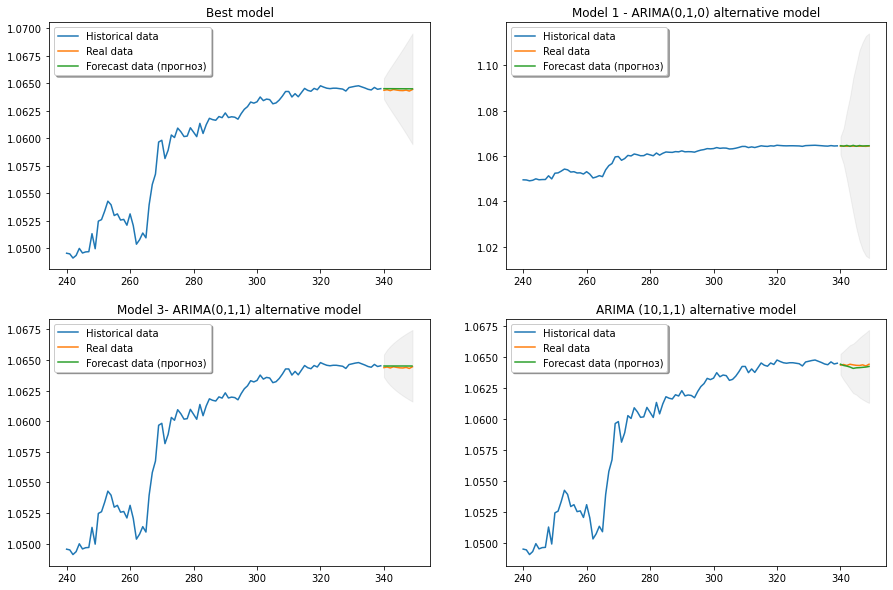

In [55]:
plt.figure(figsize=(15,10))
################################################################
plt.subplot(2,2,2)
plt.plot(x_train[len(x_train)-100:], train[len(x_train)-100:]);
plt.plot(x_test, test);
plt.plot(x_test,prediction1[1].predicted_mean);
plt.title("Model 1 - ARIMA(0,1,0) alternative model")
plt.legend(('Historical data', 'Real data', "Forecast data (прогноз)"), loc='upper left', shadow=True)
plt.fill_between(x_test,
                prediction1[1].summary_frame().mean_ci_lower,
                prediction1[1].summary_frame().mean_ci_upper,color='grey',alpha=.1)
#################################################################
plt.subplot(2,2,1);
plt.title("Best model")
plt.plot(x_train[len(x_train)-100:], train[len(x_train)-100:]);
plt.plot(x_test, test);
plt.plot(x_test,prediction2[1].predicted_mean);
#plt.plot(x_test,model_2.predict(len(x_test)));
plt.legend(('Historical data', 'Real data', "Forecast data (прогноз)"), loc='upper left', shadow=True)
plt.fill_between(x_test,
                prediction2[1].summary_frame().mean_ci_lower,
                prediction2[1].summary_frame().mean_ci_upper,color='grey',alpha=.1)
#################################################################
plt.subplot(2,2,3);
plt.title("Model 3- ARIMA(0,1,1) alternative model")
plt.plot(x_train[len(x_train)-100:], train[len(x_train)-100:]);
plt.plot(x_test, test);
plt.plot(x_test,prediction3[1].predicted_mean);
plt.legend(('Historical data', 'Real data', "Forecast data (прогноз)"), loc='upper left', shadow=True)
plt.fill_between(x_test,
                prediction3[1].summary_frame().mean_ci_lower,
                prediction3[1].summary_frame().mean_ci_upper,color='grey',alpha=.1)
#################################################################
plt.subplot(2,2,4);
plt.title("ARIMA (10,1,1) alternative model")
plt.plot(x_train[len(x_train)-100:], train[len(x_train)-100:]);
plt.plot(x_test, test);
plt.plot(x_test,prediction4[1].predicted_mean);
plt.legend(('Historical data', 'Real data', "Forecast data (прогноз)"), loc='upper left', shadow=True)
plt.fill_between(x_test,
                prediction4[1].summary_frame().mean_ci_lower,
                prediction4[1].summary_frame().mean_ci_upper,color='grey',alpha=.1)
plt.show()

#### The error analysis

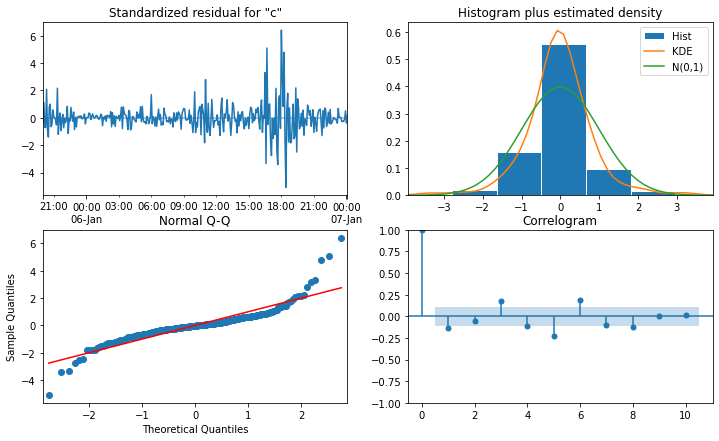

In [57]:
prediction2[0].plot_diagnostics(figsize=(12,7));

##### Warnings: Result of error analysis so-so. Simulation errors have little autocorrelation on lag=3, lag=5, lag=6

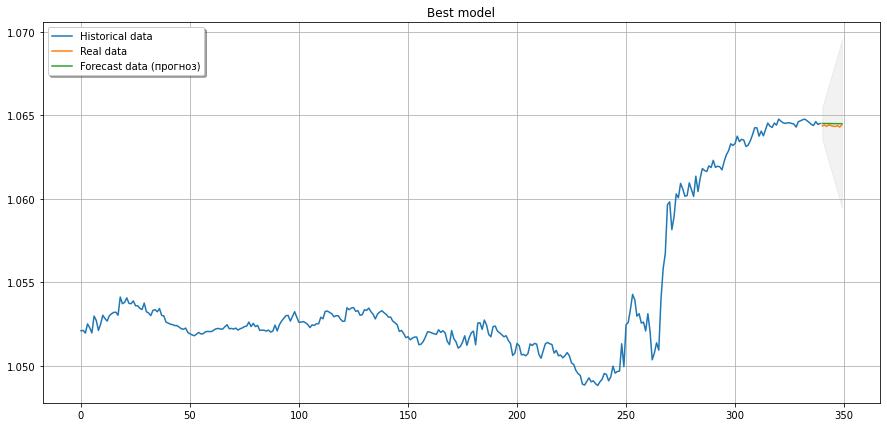

In [59]:
plt.figure(figsize=(15,7))
plt.title("Best model")
plt.plot(x_train, train);
plt.grid();
plt.plot(x_test, test);
#plt.plot(x_test,prediction2[1].predicted_mean);
plt.plot(x_test,model_2.predict(len(x_test),model_2.predict(len(x_test),return_conf_int=True)));
plt.legend(('Historical data', 'Real data', "Forecast data (прогноз)"), loc='upper left', shadow=True)
plt.fill_between(x_test,
                np.array(std["min"]),
                np.array(std["max"]),color='grey',alpha=.1)
plt.show()

##### Table with information about best model

In [61]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  340
Model:               SARIMAX(0, 2, 1)   Log Likelihood                2097.918
Date:                Sat, 07 Jan 2023   AIC                          -4191.837
Time:                        19:27:42   BIC                          -4184.191
Sample:                    01-05-2023   HQIC                         -4188.789
                         - 01-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8631      0.018    -49.118      0.000      -0.898      -0.829
sigma2      2.356e-07   7.54e-09     31.257      0.000    2.21e-07     2.5e-07
===================================================================================
Ljung-Box (L1) (Q):                   6.27   Jarque-Bera (JB):              1562.97
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.44   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""